##  Лабораторна робота No4

### Структури для роботи з великими обсягами даних в Python
#### ФБ-21 Худоба Арсен
<b>Мета:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)
Основні поняття: numpy масиви, кортежі, списки, фрейми, профілювання.
### Завдання другого рівня

In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates, radviz
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

1. Поборотися із зниклими даними. Для цього в допомогу вам Медіум(https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
df = heart_disease['data']['features'] 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [3]:
def checknull(df):    
    missing_values = df.isnull().any()
    print(missing_values)

In [8]:
df_mean = df.copy()
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
transformed_values = imputer.fit_transform(df_mean)
df_mean = pd.DataFrame(transformed_values, columns=df_mean.columns)

df_mean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0


In [4]:
df_median = df.copy()
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
transformed_values = imputer.fit_transform(df_median)
df_median = pd.DataFrame(transformed_values, columns=df_median.columns)

df_median

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [5]:
df_drop = df.copy()
df_drop = df_drop.dropna()
df_drop

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [6]:
checknull(df)

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
dtype: bool


In [9]:
dfdel = df_mean

2. Пронормувати вибраний датасет або стандартизувати його(нормалізація і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [10]:
def normalize_data(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df

# Приклад використання
normalized_df = normalize_data(dfdel)
normalized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00
301,0.583333,0.0,0.333333,0.339623,0.251142,0.0,1.0,0.786260,0.0,0.000000,0.5,0.333333,0.00


In [11]:
def standardize_data(df):
    standardized_df = (df - df.mean()) / df.std()
    return standardized_df

# Приклад використання
standardized_df = standardize_data(dfdel)
standardized_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.947160,0.685069,-2.248056,0.756274,-0.264463,2.390484,1.015005,0.017169,-0.69548,1.085542,2.270822,-0.721901,0.654735
1,1.389703,0.685069,0.876535,1.608559,0.759159,-0.416945,1.015005,-1.818896,1.43311,0.396526,0.648041,2.499716,-0.897038
2,1.389703,0.685069,0.876535,-0.664201,-0.341717,-0.416945,1.015005,-0.900864,1.43311,1.343924,0.648041,1.425844,1.171993
3,-1.929372,0.685069,-0.164995,-0.096011,0.063869,-0.416945,-0.995103,1.634655,-0.69548,2.119067,2.270822,-0.721901,-0.897038
4,-1.486829,-1.454889,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,0.978917,-0.69548,0.310399,-0.974740,-0.721901,-0.897038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.044285,0.685069,-2.248056,-1.232391,0.334260,-0.416945,-0.995103,-0.769716,-0.69548,0.138144,0.648041,-0.721901,1.171993
299,1.500339,0.685069,0.876535,0.699455,-1.037008,2.390484,-0.995103,-0.376274,-0.69548,2.032940,0.648041,1.425844,1.171993
300,0.283345,0.685069,0.876535,-0.096011,-2.234453,-0.416945,-0.995103,-1.512885,1.43311,0.138144,0.648041,0.351972,1.171993
301,0.283345,-1.454889,-1.206525,-0.096011,-0.206522,-0.416945,1.015005,1.066349,-0.69548,-0.895381,0.648041,0.351972,-0.897038


3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

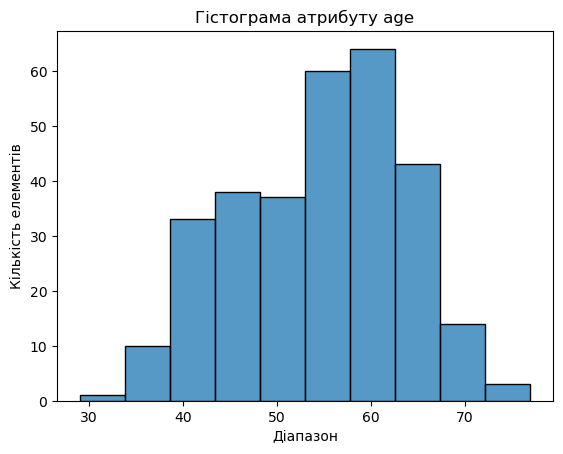

In [12]:
attribute = 'age'
sns.histplot(dfdel[attribute], bins=10)
plt.xlabel('Діапазон')
plt.ylabel('Кількість елементів')
plt.title('Гістограма атрибуту {}'.format(attribute))
plt.show()


4. Збудувати графік залежності одного integer/real атрибута від іншого.

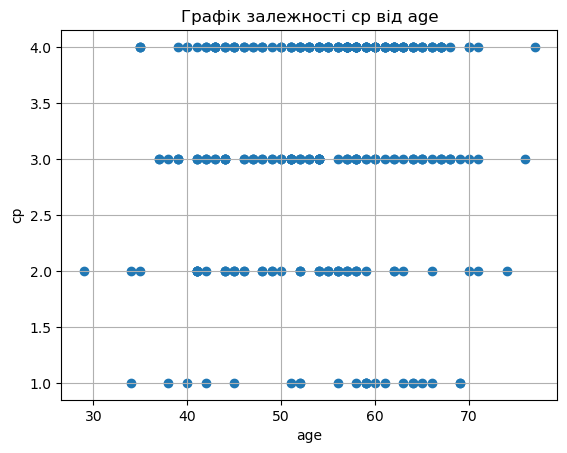

In [13]:
x_attribute = 'age'
y_attribute = 'cp'

plt.scatter(dfdel[x_attribute], dfdel[y_attribute])
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title('Графік залежності {} від {}'.format(y_attribute, x_attribute))
plt.grid(True)
plt.show()


5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [14]:
pearson_corr = stats.pearsonr(df['age'], df['trestbps'])

spearman_corr = stats.spearmanr(df['age'], df['trestbps'])

print("Pearson correlation coefficient:", pearson_corr)
print("Spearman correlation coefficient:", spearman_corr)

Pearson correlation coefficient: PearsonRResult(statistic=0.2849459193136903, pvalue=4.547476967620812e-07)
Spearman correlation coefficient: SignificanceResult(statistic=0.29218326471011025, pvalue=2.237728251954262e-07)


6. Провести One Hot Encoding категоріального string атрибуту.

In [25]:
hotDF = df_mean
encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(hotDF[['sex']])
sex_encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['sex']))
hotDF = pd.concat([hotDF, sex_encoded_df], axis=1)
hotDF.drop(['sex'], axis=1, inplace=True)

hotDF

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_0.0,sex_1.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0.0,1.0
1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,0.0,1.0
2,67.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,0.0,1.0
3,37.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0,1.0
4,41.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,0.0,1.0
299,68.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,0.0,1.0
300,57.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,0.0,1.0
301,57.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0,0.0


7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

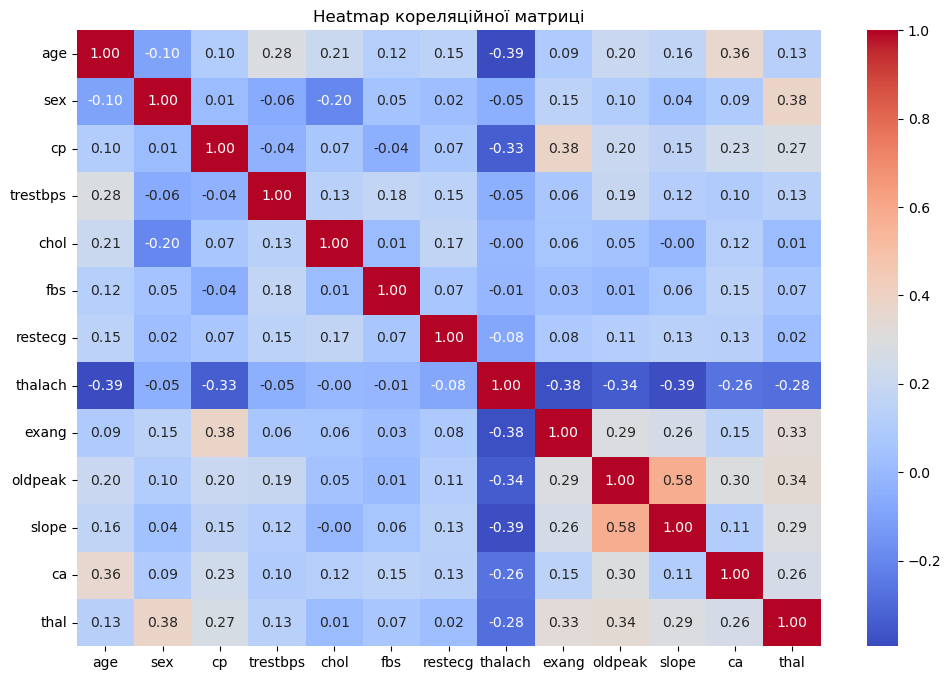

In [17]:
corr_matrix = df.corr()

# Побудова теплової карти
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap кореляційної матриці')
plt.show()

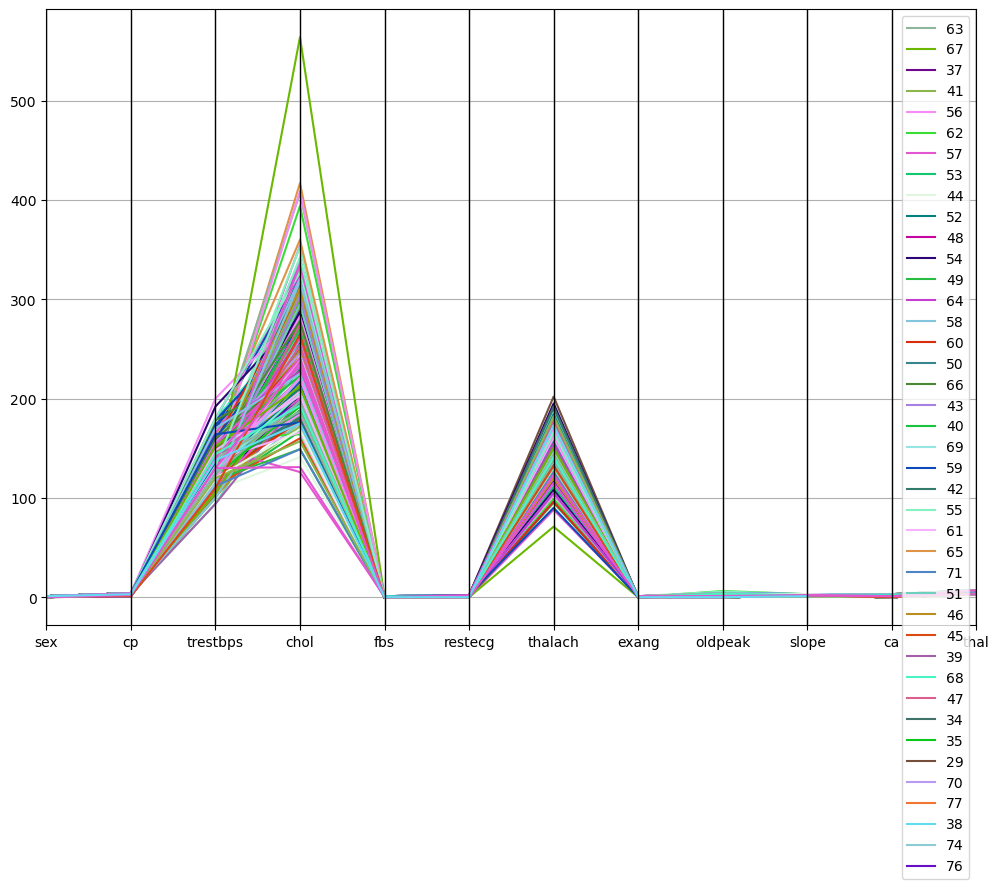

In [18]:
plt.figure(figsize=(12, 8))
parallel_coordinates(df, 'age')
plt.show()

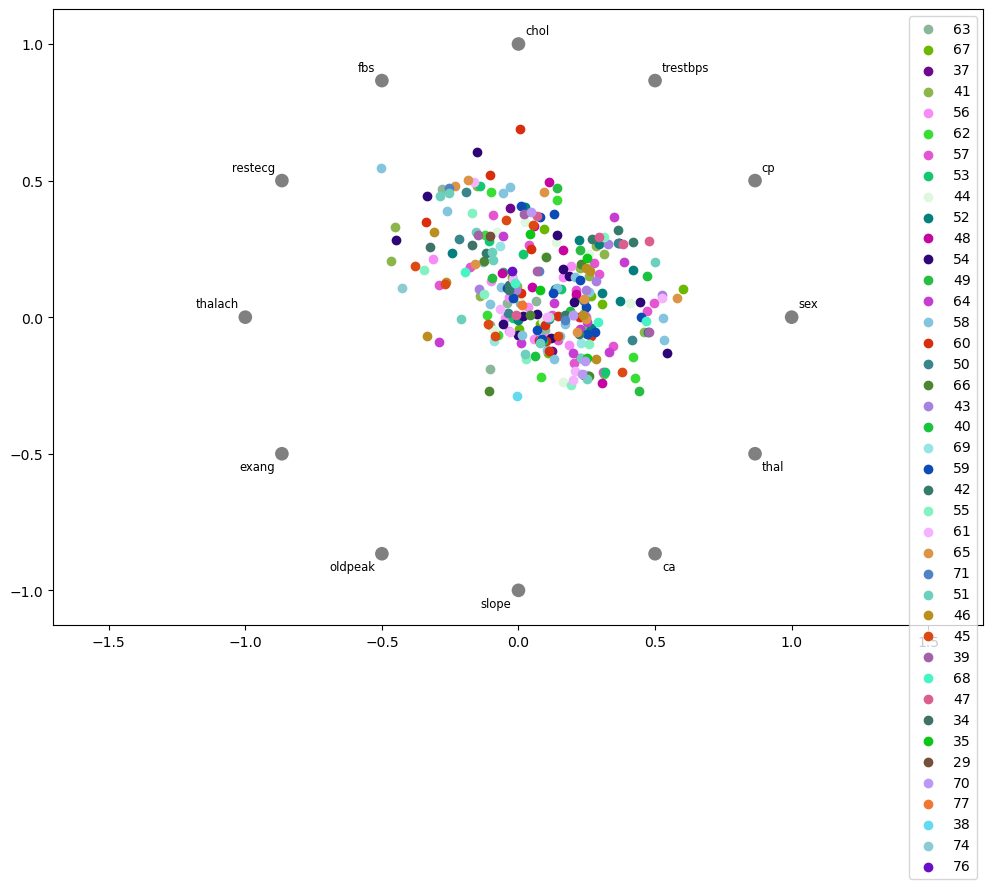

In [56]:
plt.figure(figsize=(12, 8))
radviz(df, 'age')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


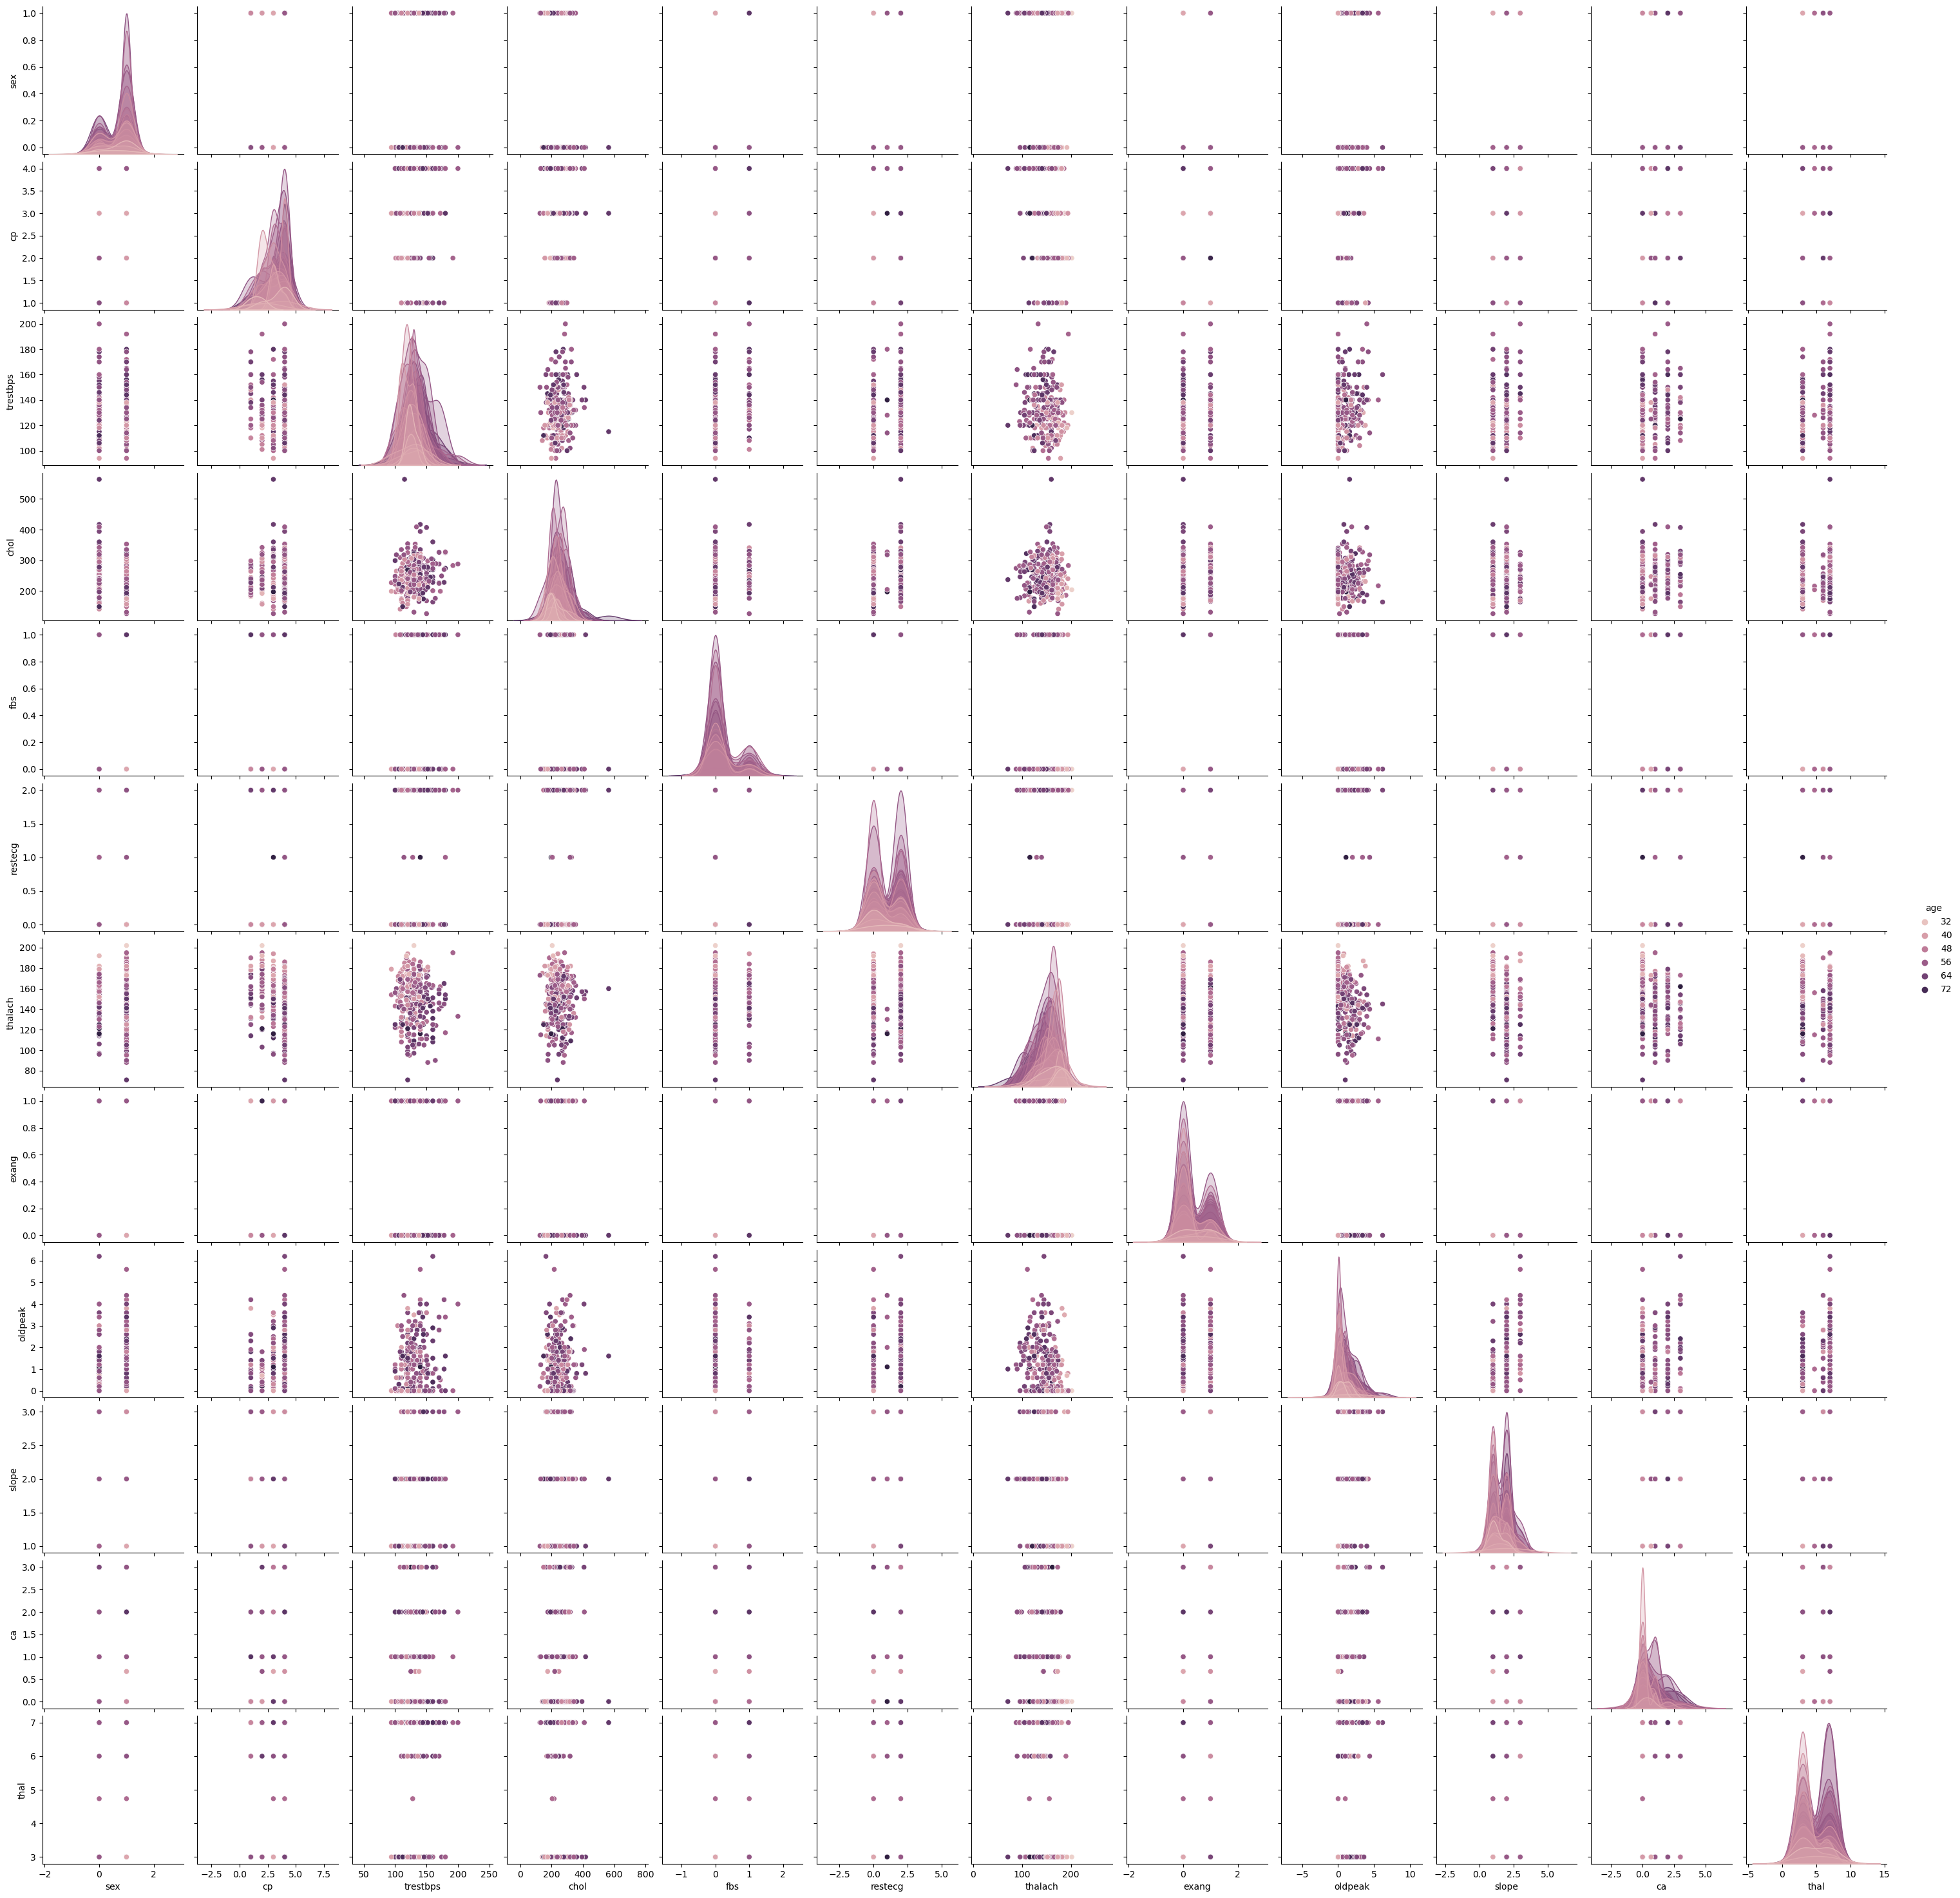

In [121]:
sns.pairplot(dfdel, hue="age")